#### Simulation: Different ACs

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import matplotlib.pyplot as plt

from utills.geodata import generate_grid_dataframe,calculate_moran_i

from utills.adjacency_simplex import AdjacencySimplex 
from utills.calculate_tda_summaries import compute_persistence

In [2]:
NUM_OF_ITERATIONS = 50
GRID_SIZE = 12

# Set the random seed
# np.random.seed(0)

RANDOM_SEED_LIST = list(range(NUM_OF_ITERATIONS))

In [3]:
# create a empty df to store the results
results_df = pd.DataFrame(columns=['Iteration', 'Random Seed','Autocorrlation', 'Moran I', 'Filter Method', 'Number of H0 Points', 'TL', 'AL', 'TML', 'AML','Average'])


In [4]:

i = 0 
for iter in range(NUM_OF_ITERATIONS):

    # print(f"Iteration: {iter}")
    RANDOM_SEED = RANDOM_SEED_LIST[iter]

    # Generate a grid dataframe
    gdf_positive = generate_grid_dataframe(grid_side_length=GRID_SIZE, autocorrelation="positive", random_seed=RANDOM_SEED)
    gdf_negative = generate_grid_dataframe(grid_side_length=GRID_SIZE, autocorrelation="negative", random_seed=RANDOM_SEED)
    gdf_random = generate_grid_dataframe(grid_side_length=GRID_SIZE, autocorrelation="none", random_seed=RANDOM_SEED)
    gdf_cluster = generate_grid_dataframe(grid_side_length=GRID_SIZE, autocorrelation="cluster", random_seed=RANDOM_SEED)

    # add to a dictionary
    gdf_dict = {'positive': gdf_positive, 'negative': gdf_negative, 'random': gdf_random, 'cluster': gdf_cluster}

    for key, gdf in gdf_dict.items():

        # Calculate the average
        average = gdf['Value'].mean()

        # Calculate Moran I
        moran_i = calculate_moran_i(gdf, GRID_SIZE)

        for filter_method in ['up','down']:

            # Initialize the AdjacencySimplex class
            adj_simplex = AdjacencySimplex(gdf, 'Value', threshold = None, filter_method = filter_method)

            # Filter the GeoDataFrame
            filtered_df,gdf_id = adj_simplex.filter_sort_gdf()

            # Calculate the adjacent countries
            adj_simplex.calculate_adjacent_countries()

            # Form the simplicial complex
            simplex = adj_simplex.form_simplicial_complex()

            # Compute the persistence
            _,TL, AL, TML, AML,_ = compute_persistence(simplices=simplex,filtered_df=filtered_df,variable_name='Value')

            # Add the results to the results_df

            new_row = pd.DataFrame({'Iteration': [i], 'Random Seed': [RANDOM_SEED],'Autocorrlation': [key], 'Moran I': [moran_i], 'Filter Method': [filter_method], 'Number of H0 Points': [len(filtered_df)], 'TL': [TL], 'AL': [AL], 'TML': [TML], 'AML': [AML],'Average': [average]})
            results_df = pd.concat([results_df, new_row], ignore_index=True)
        i+=1


/var/folders/j3/904q7dbj02j_jyjz7pvfgz384d40kw/T/ipykernel_69530/2217853720.py:44: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([results_df, new_row], ignore_index=True)


In [5]:
results_df.head(3)

,Iteration,Random Seed,Autocorrlation,Moran I,Filter Method,Number of H0 Points,TL,AL,TML,AML,Average
0,0,0,positive,0.884715,up,144,77.617960,0.539014,38.808980,0.269507,0.535528
1,0,0,positive,0.884715,down,144,33.291882,0.231194,16.645941,0.115597,0.535528
2,1,0,negative,-0.987965,up,144,40.598902,0.534196,17.696756,0.232852,-0.003903


Filter Method: UP

Autocorrlation: Positive

In [6]:
filter = 'down'

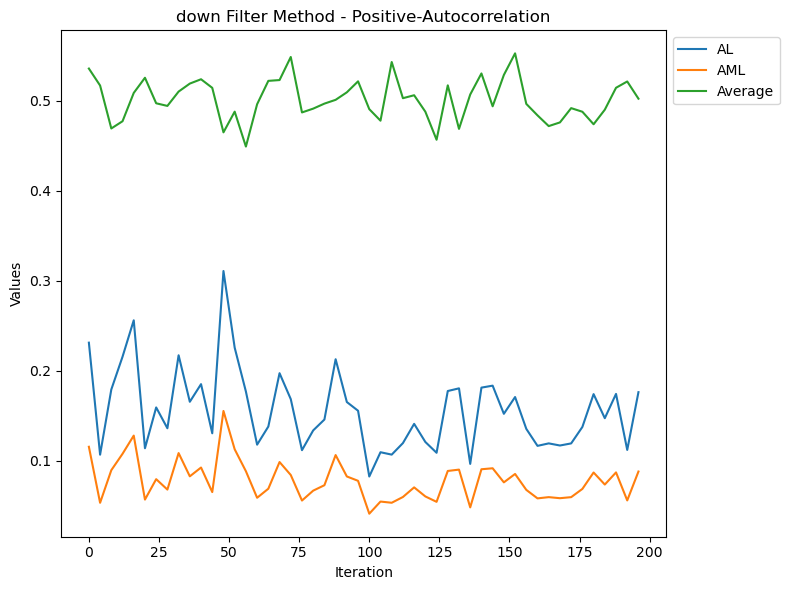

In [7]:
temp = results_df[(results_df['Filter Method'] == filter) & (results_df['Autocorrlation'] == 'positive')]

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Plot all columns against 'Iteration' on the same plot
ax.plot(temp['Iteration'], temp['AL'], label='AL')
ax.plot(temp['Iteration'], temp['AML'], label='AML')
ax.plot(temp['Iteration'], temp['Average'], label='Average')

# Labels and title
ax.set_xlabel('Iteration')
ax.set_ylabel('Values')
ax.set_title(f"{filter} Filter Method - Positive-Autocorrelation")

# Add legend outside the plot
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Adjust layout to fit the legend
plt.tight_layout()

# Show the plot
plt.show()


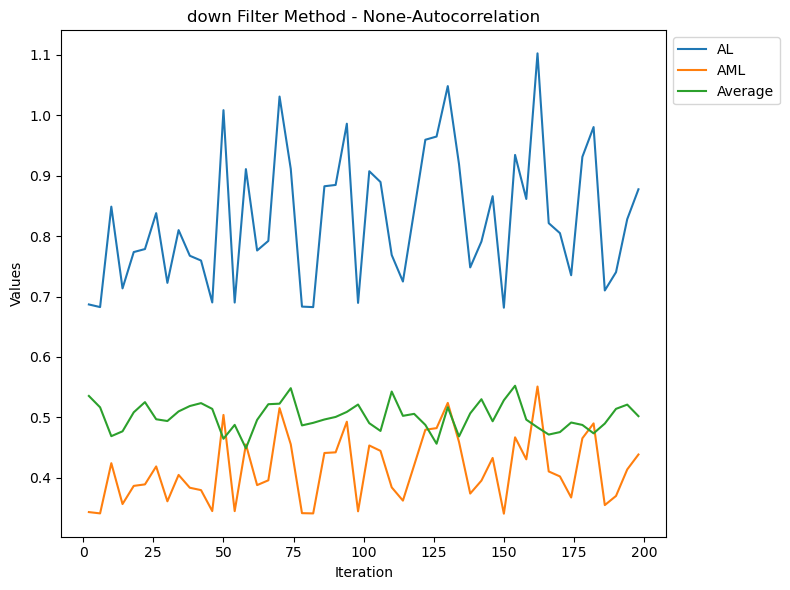

In [8]:
temp = results_df[(results_df['Filter Method'] == filter) & (results_df['Autocorrlation'] == 'random')]

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Plot all columns against 'Iteration' on the same plot
ax.plot(temp['Iteration'], temp['AL'], label='AL')
ax.plot(temp['Iteration'], temp['AML'], label='AML')
ax.plot(temp['Iteration'], temp['Average'], label='Average')

# Labels and title
ax.set_xlabel('Iteration')
ax.set_ylabel('Values')
ax.set_title(f"{filter} Filter Method - None-Autocorrelation")

# Add legend outside the plot
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Adjust layout to fit the legend
plt.tight_layout()

# Show the plot
plt.show()


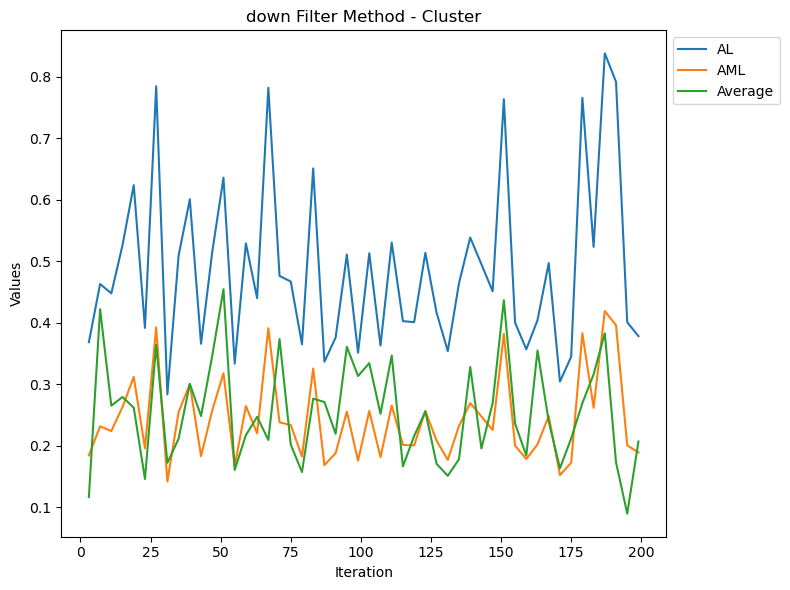

In [9]:
temp = results_df[(results_df['Filter Method'] == filter) & (results_df['Autocorrlation'] == 'cluster')]

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Plot all columns against 'Iteration' on the same plot
ax.plot(temp['Iteration'], temp['AL'], label='AL')
ax.plot(temp['Iteration'], temp['AML'], label='AML')
ax.plot(temp['Iteration'], temp['Average'], label='Average')

# Labels and title
ax.set_xlabel('Iteration')
ax.set_ylabel('Values')
ax.set_title(f"{filter} Filter Method - Cluster")

# Add legend outside the plot
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Adjust layout to fit the legend
plt.tight_layout()

# Show the plot
plt.show()


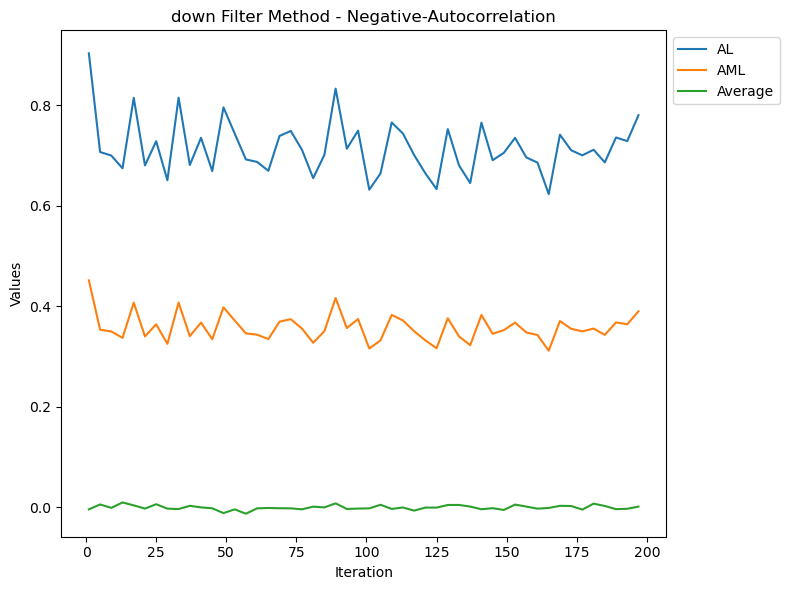

In [10]:
temp = results_df[(results_df['Filter Method'] == filter) & (results_df['Autocorrlation'] == 'negative')]

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Plot all columns against 'Iteration' on the same plot
ax.plot(temp['Iteration'], temp['AL'], label='AL')
ax.plot(temp['Iteration'], temp['AML'], label='AML')
ax.plot(temp['Iteration'], temp['Average'], label='Average')

# Labels and title
ax.set_xlabel('Iteration')
ax.set_ylabel('Values')
ax.set_title(f"{filter} Filter Method - Negative-Autocorrelation")

# Add legend outside the plot
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Adjust layout to fit the legend
plt.tight_layout()

# Show the plot
plt.show()


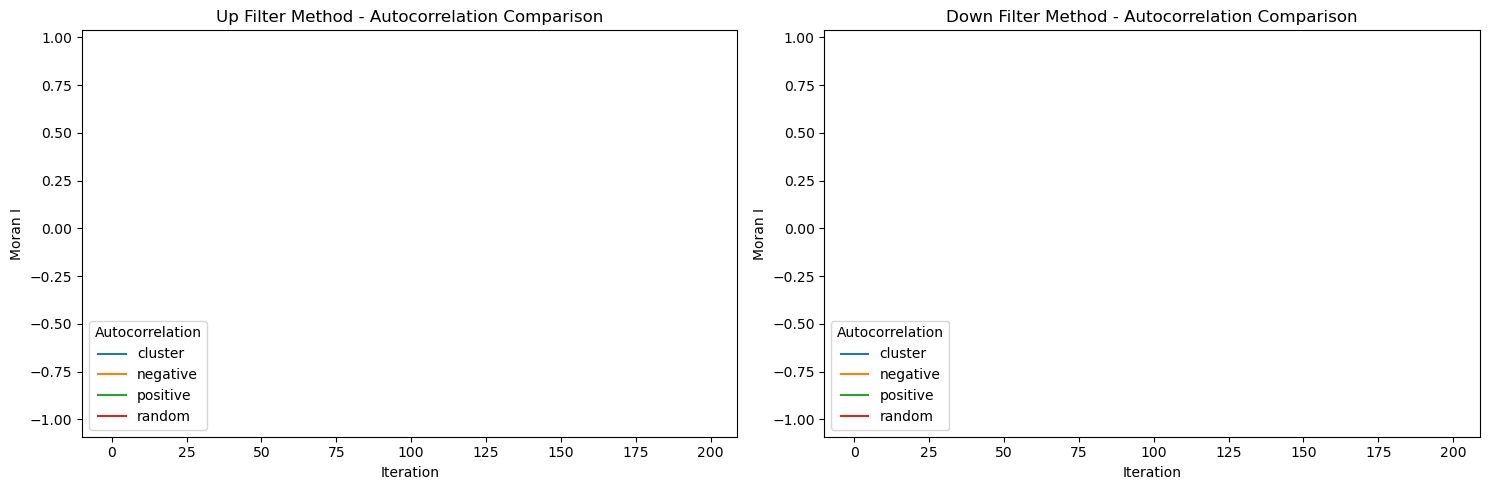

In [11]:
# Define filter methods
filter_methods = ['up', 'down']
titles = ["Up Filter Method", "Down Filter Method"]

# Create subplots for filter method comparison, then group by autocorrelation
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

for i, filter_method in enumerate(filter_methods):
    # Step 1: Filter the dataframe by filter method (up/down)
    filtered_df = results_df[results_df['Filter Method'] == filter_method]
    
    # Step 2: Group by autocorrelation, then by iteration, and compute mean TL
    grouped_df = filtered_df.groupby(['Autocorrlation', 'Iteration'])['Moran I'].mean().unstack(0)
    
    # Step 3: Plot the grouped data
    grouped_df.plot(ax=axes[i])
    
    # Set plot titles and labels
    axes[i].set_title(f"{titles[i]} - Autocorrelation Comparison")
    axes[i].set_xlabel("Iteration")
    axes[i].set_ylabel("Moran I")
    axes[i].legend(title="Autocorrelation")

# Adjust layout for better clarity
plt.tight_layout()
plt.show()

In [12]:
results_df.head()

,Iteration,Random Seed,Autocorrlation,Moran I,Filter Method,Number of H0 Points,TL,AL,TML,AML,Average
0,0,0,positive,0.884715,up,144,77.617960,0.539014,38.808980,0.269507,0.535528
1,0,0,positive,0.884715,down,144,33.291882,0.231194,16.645941,0.115597,0.535528
2,1,0,negative,-0.987965,up,144,40.598902,0.534196,17.696756,0.232852,-0.003903
3,1,0,negative,-0.987965,down,144,130.012731,0.902866,65.006365,0.451433,-0.003903
4,2,0,random,0.089683,up,144,84.071228,0.587911,41.941375,0.293296,0.535528


In [13]:
up_positive.head()

NameError: name 'up_positive' is not defined

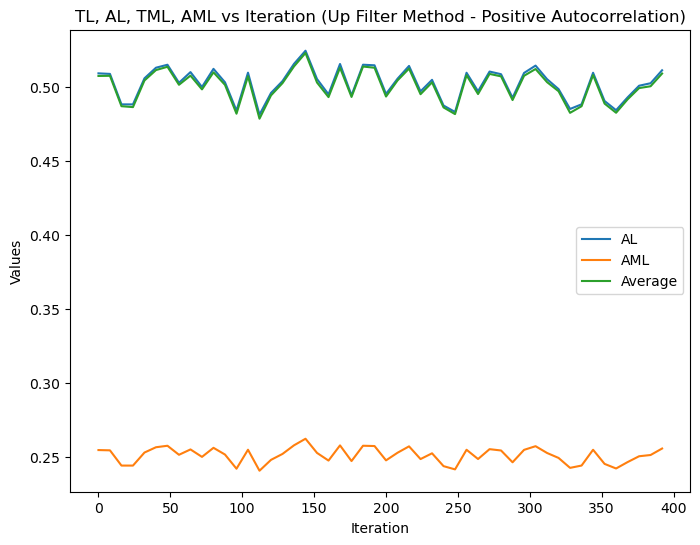

In [ ]:
# get up method ac positive
up_positive = results_df[(results_df['Filter Method'] == 'up') & (results_df['Autocorrlation'] == 'positive')]

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Plot all columns against 'Iteration' on the same plot
# ax.plot(up_positive['Iteration'], up_positive['TL'], label='TL')
ax.plot(up_positive['Iteration'], up_positive['AL'], label='AL')
# ax.plot(up_positive['Iteration'], up_positive['TML'], label='TML')
ax.plot(up_positive['Iteration'], up_positive['AML'], label='AML')
ax.plot(up_positive['Iteration'], up_positive['Average'], label='Average')

# Labels and title
ax.set_xlabel('Iteration')
ax.set_ylabel('Values')
ax.set_title("TL, AL, TML, AML vs Iteration (Up Filter Method - Positive Autocorrelation)")

# Add legend
ax.legend()

# Show the plot
plt.show()


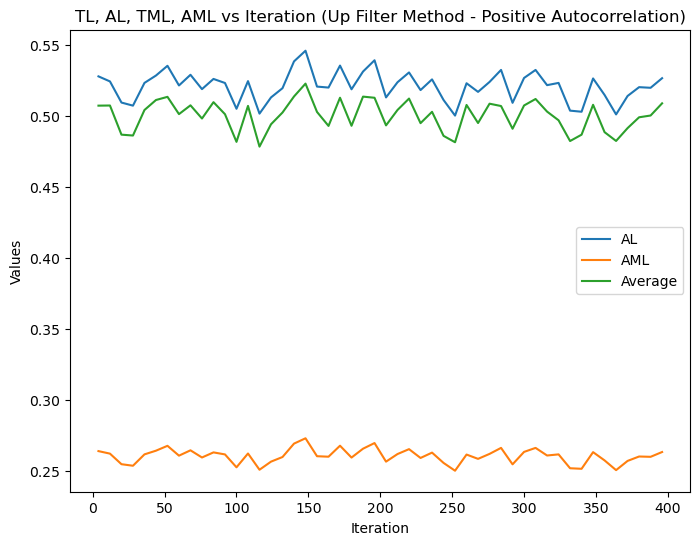

In [ ]:
# get up method ac positive
up_positive = results_df[(results_df['Filter Method'] == 'up') & (results_df['Autocorrlation'] == 'random')]

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Plot all columns against 'Iteration' on the same plot
# ax.plot(up_positive['Iteration'], up_positive['TL'], label='TL')
ax.plot(up_positive['Iteration'], up_positive['AL'], label='AL')
# ax.plot(up_positive['Iteration'], up_positive['TML'], label='TML')
ax.plot(up_positive['Iteration'], up_positive['AML'], label='AML')
ax.plot(up_positive['Iteration'], up_positive['Average'], label='Average')

# Labels and title
ax.set_xlabel('Iteration')
ax.set_ylabel('Values')
ax.set_title("TL, AL, TML, AML vs Iteration (Up Filter Method - Positive Autocorrelation)")

# Add legend
ax.legend()

# Show the plot
plt.show()

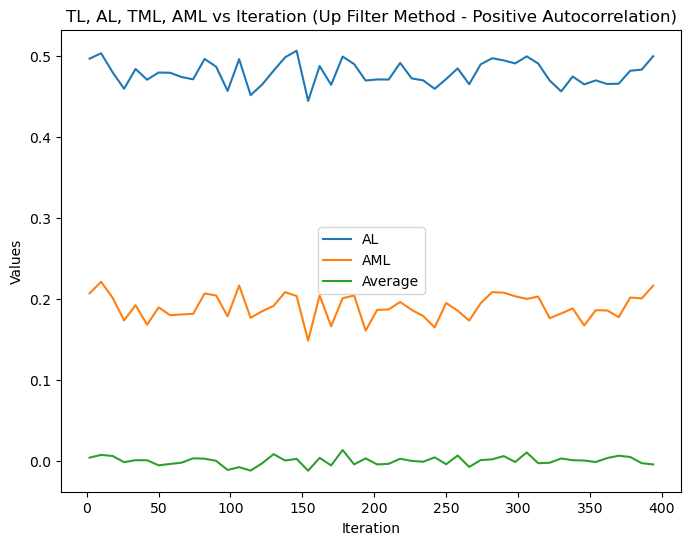

In [ ]:
# get up method ac positive
up_positive = results_df[(results_df['Filter Method'] == 'up') & (results_df['Autocorrlation'] == 'negative')]

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Plot all columns against 'Iteration' on the same plot
# ax.plot(up_positive['Iteration'], up_positive['TL'], label='TL')
ax.plot(up_positive['Iteration'], up_positive['AL'], label='AL')
# ax.plot(up_positive['Iteration'], up_positive['TML'], label='TML')
ax.plot(up_positive['Iteration'], up_positive['AML'], label='AML')
ax.plot(up_positive['Iteration'], up_positive['Average'], label='Average')

# Labels and title
ax.set_xlabel('Iteration')
ax.set_ylabel('Values')
ax.set_title("TL, AL, TML, AML vs Iteration (Up Filter Method - Positive Autocorrelation)")

# Add legend
ax.legend()

# Show the plot
plt.show()

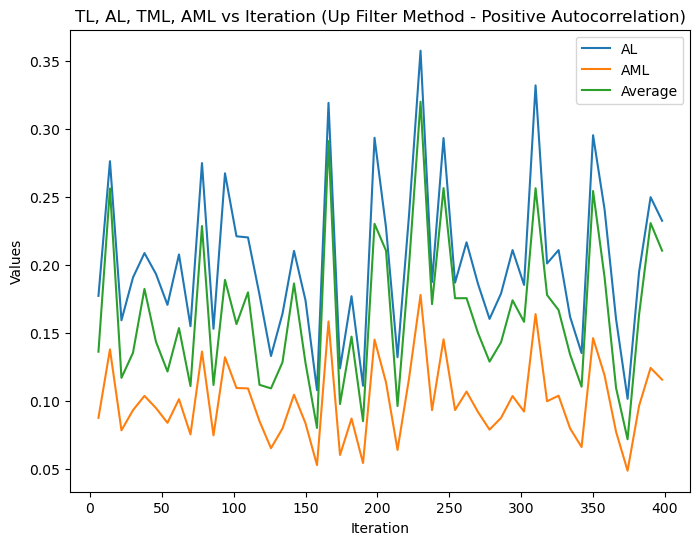

In [ ]:
# get up method ac positive
up_positive = results_df[(results_df['Filter Method'] == 'up') & (results_df['Autocorrlation'] == 'cluster')]

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Plot all columns against 'Iteration' on the same plot
# ax.plot(up_positive['Iteration'], up_positive['TL'], label='TL')
ax.plot(up_positive['Iteration'], up_positive['AL'], label='AL')
# ax.plot(up_positive['Iteration'], up_positive['TML'], label='TML')
ax.plot(up_positive['Iteration'], up_positive['AML'], label='AML')
ax.plot(up_positive['Iteration'], up_positive['Average'], label='Average')

# Labels and title
ax.set_xlabel('Iteration')
ax.set_ylabel('Values')
ax.set_title("TL, AL, TML, AML vs Iteration (Up Filter Method - Positive Autocorrelation)")

# Add legend
ax.legend()

# Show the plot
plt.show()